<img src="./images/f3i-signature.png" alt="F3i Logo" width="200">

# Data Challenge Onboarding Module

### The Data
The file `FresnoState_daily.csv` contains daily meteorological observations collected from the **California Irrigation Management Information System (CIMIS)** weather station located in Fresno State, Fresno, California. This station is part of a statewide automated network that records environmental and agricultural weather data used to support irrigation scheduling, crop monitoring, and local climate research.

### Data Collection and Time Period
- **Source:** CIMIS Station #80 - Fresno State, San Joaquin Valley Region
- **Period of Record:** September 2010 - September 2014 (~4 years, 1278 days)

Sensor measurements are recorded throughout each day and processed by CIMIS into **daily averages**, **minima**, **and maxima** for key weather parameters. For this exercise, we focus on predicting whether it will rain tomorrow, using the previous day’s meteorological conditions.

This problem is a simplified version of short-term weather forecasting, where the goal is to learn relationships between factors such as air temperature, humidity, wind, and dew point, and the likelihood of precipitation the following day.

| Variable                 | Description                                                             | Unit                                |
| ------------------------ | ----------------------------------------------------------------------- | ----------------------------------- |
| **Date**                 | Date of the observation (local time)                                    | YYYY-MM-DD                          |
| **ETo (mm)**             | Reference evapotranspiration                                            | millimeters/day                     |
| **Precip (mm)**          | Precipitation accumulated over 24 hours                                 | millimeters                         |
| **Sol Rad (MJ/m²/day)**  | Daily total incoming solar radiation                                    | megajoules per square meter per day |
| **Avg Vap Pres (mBars)** | Average vapor pressure (humidity indicator)                             | millibars                           |
| **Max Air Temp (°C)**    | Maximum air temperature                                                 | °C                                  |
| **Min Air Temp (°C)**    | Minimum air temperature                                                 | °C                                  |
| **Avg Air Temp (°C)**    | Mean air temperature                                                    | °C                                  |
| **Max Rel Hum (%)**      | Maximum relative humidity                                               | percent                             |
| **Min Rel Hum (%)**      | Minimum relative humidity                                               | percent                             |
| **Avg Rel Hum (%)**      | Mean relative humidity                                                  | percent                             |
| **Dew Point (°C)**       | Average dew point temperature                                           | °C                                  |
| **Avg Wind Speed (m/s)** | Average wind speed at 2 meters above surface                            | meters per second                   |
| **Avg Soil Temp (°C)**   | Average soil temperature at 10 cm depth                                 | °C                                  |


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# TODO: Switch to URL based for NDP platform
DATA_DIR = Path("./data")
CSV = DATA_DIR / "FresnoState_daily_weather.csv"

In [4]:
# We load the data into a pandas df
df = pd.read_csv(CSV)

# Let's look at the data
df

,ETo (mm),Precip (mm),Sol Rad (W/sq.m),Avg Vap Pres (kPa),Max Air Temp (C),Min Air Temp (C),Avg Air Temp (C),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (C),Avg Wind Speed (m/s),Avg Soil Temp (C)
0,4.60,0.0,237.0,1.4,37.5,14.9,25.4,81.0,18.0,43.0,12.0,1.1,20.6
1,4.64,0.0,227.0,1.6,37.1,15.5,25.9,88.0,21.0,47.0,13.8,1.2,20.9
2,4.25,0.0,209.0,1.6,37.1,17.6,26.5,83.0,21.0,48.0,14.4,1.0,21.3
3,4.74,0.0,211.0,1.5,37.4,18.0,27.4,83.0,22.0,42.0,13.4,1.3,21.6
4,2.70,0.2,131.0,1.6,32.5,18.1,25.4,77.0,29.0,48.0,13.8,1.2,21.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,4.24,0.0,268.0,1.0,23.7,7.7,15.6,89.0,32.0,54.0,6.4,1.7,15.8
1230,4.75,0.0,273.0,0.8,25.3,6.4,16.4,88.0,20.0,44.0,4.2,1.8,15.8
1231,4.80,0.0,271.0,0.9,27.5,7.1,17.7,84.0,23.0,44.0,5.2,1.7,16.0
1232,4.82,0.0,230.0,0.9,23.5,7.8,16.2,86.0,15.0,50.0,5.8,2.9,16.1


In [5]:
# Let's display the summary statistics for each of the columns
df.describe()

,ETo (mm),Precip (mm),Sol Rad (W/sq.m),Avg Vap Pres (kPa),Max Air Temp (C),Min Air Temp (C),Avg Air Temp (C),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (C),Avg Wind Speed (m/s),Avg Soil Temp (C)
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,3.868144,0.713533,213.926256,1.080794,24.110049,9.017342,16.433712,85.949757,35.717990,58.543760,7.546029,1.900891,17.150891
std,2.363910,3.424010,99.225412,0.304488,8.363488,6.510288,7.443250,10.233482,16.844883,16.686415,4.280816,0.829636,5.645544
min,0.000000,0.000000,11.000000,0.400000,4.300000,-5.600000,1.400000,46.000000,0.000000,25.000000,-5.300000,0.400000,7.200000
25%,1.692500,0.000000,128.000000,0.825000,17.300000,3.700000,10.000000,79.000000,23.000000,44.000000,4.600000,1.200000,11.700000
50%,3.500000,0.000000,214.000000,1.000000,23.500000,8.900000,15.800000,89.000000,31.000000,58.000000,7.600000,1.700000,16.500000
75%,6.130000,0.100000,309.000000,1.300000,31.900000,14.575000,23.400000,95.000000,46.000000,72.000000,10.900000,2.300000,22.500000
max,9.230000,53.800000,473.000000,2.100000,42.000000,24.900000,31.900000,97.000000,93.000000,96.000000,18.100000,5.500000,28.100000


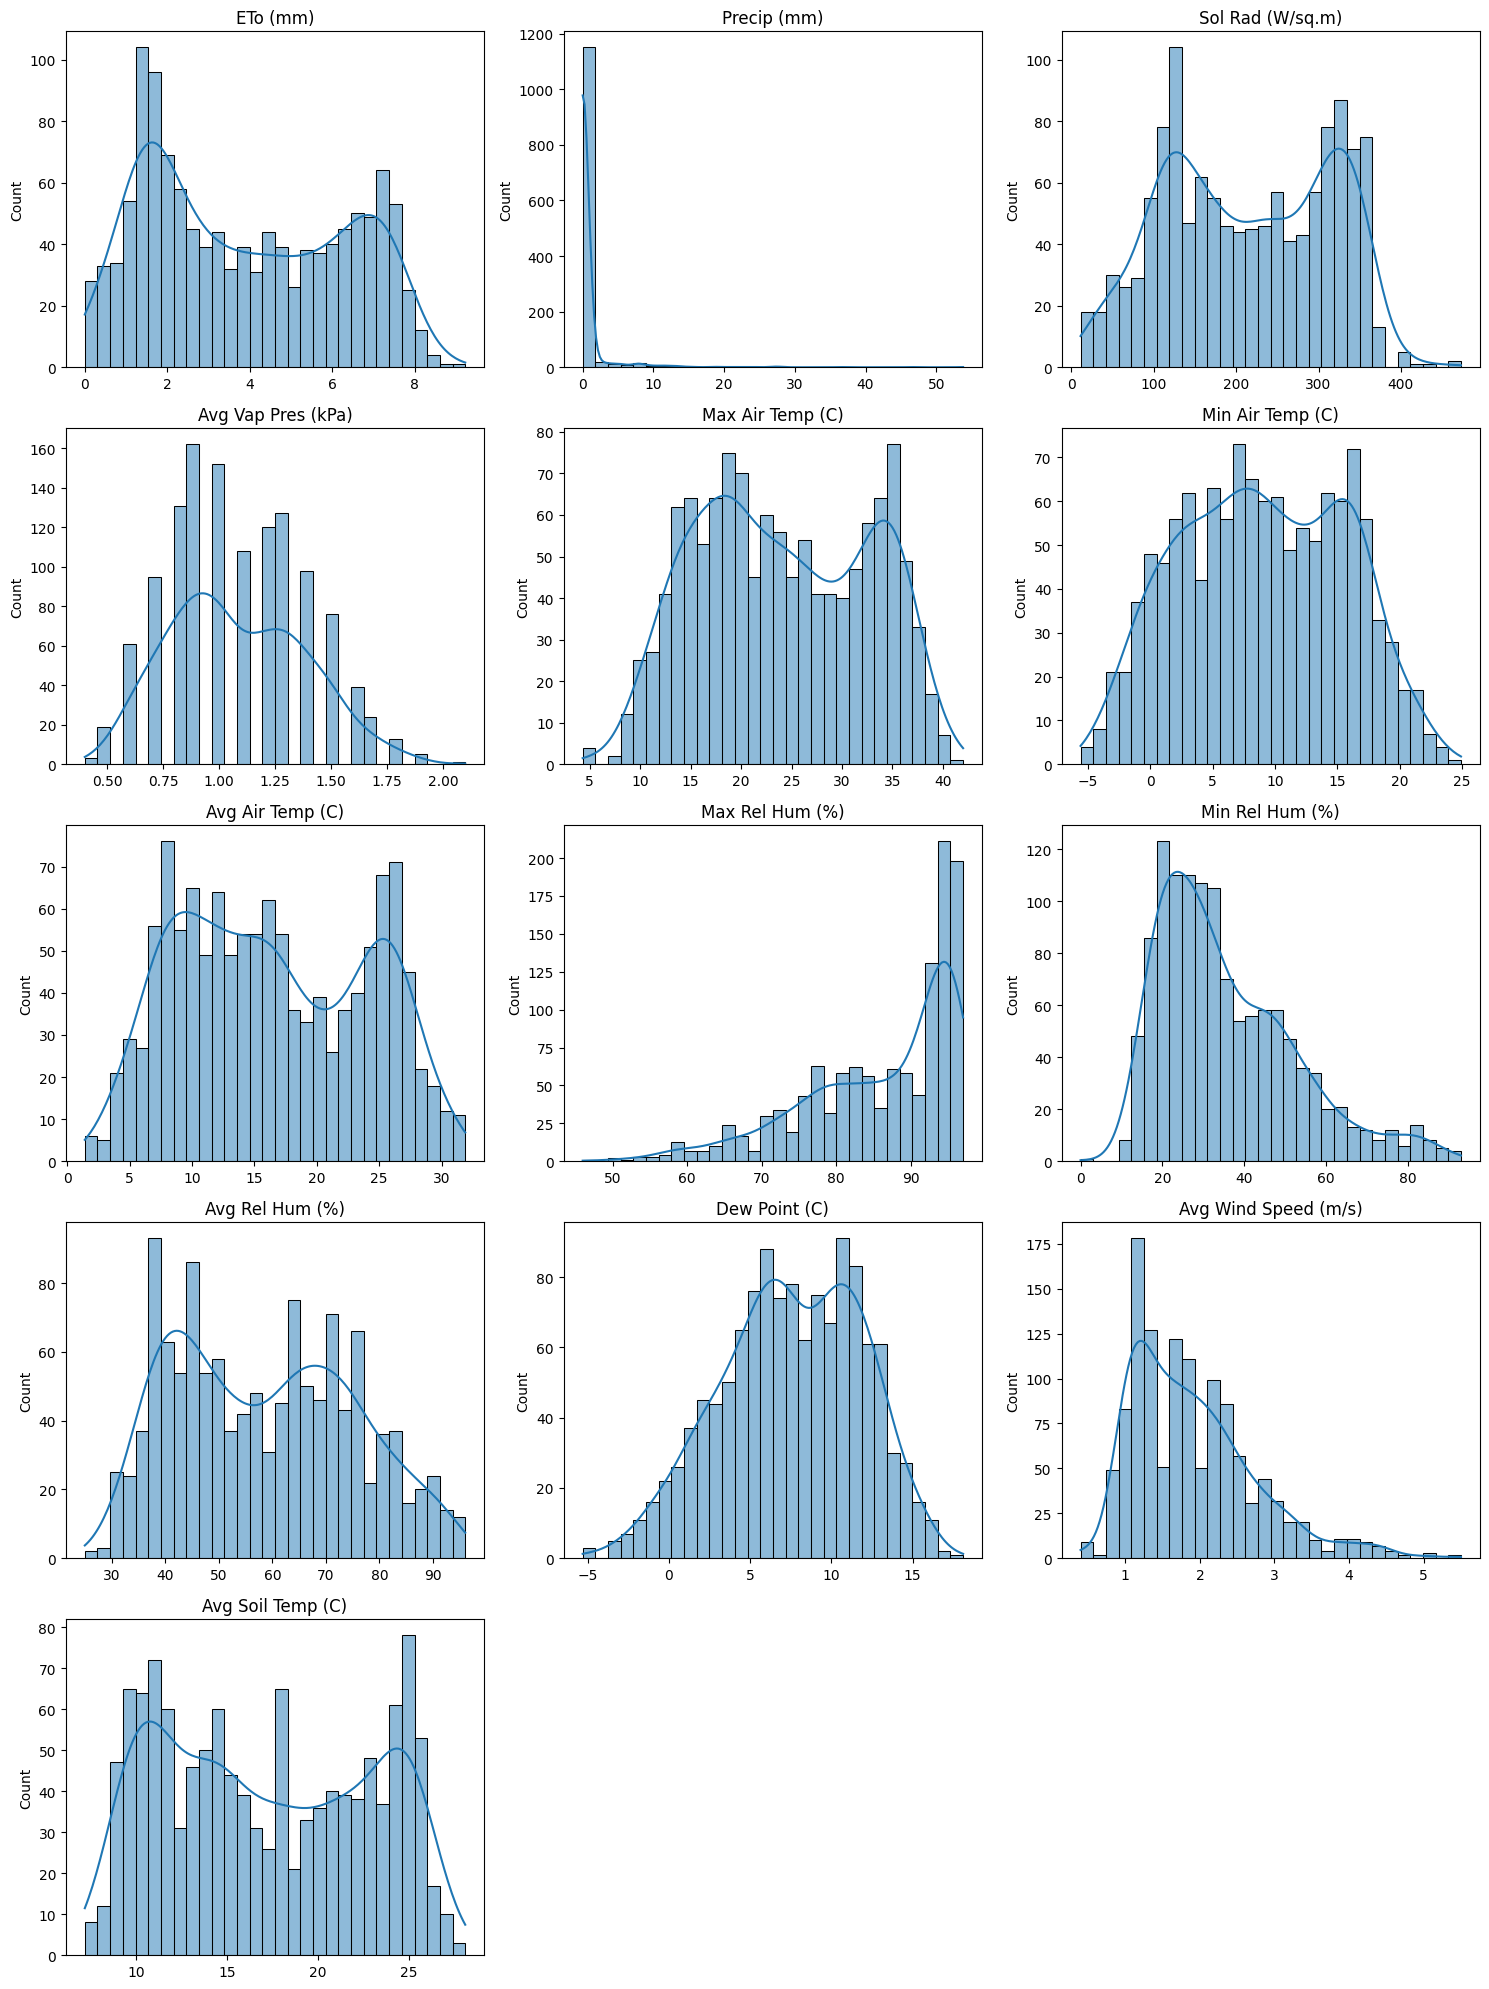

In [6]:
# Now, let's look at the distribution of each of the columns

num_cols = len(df.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0) 

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4 * num_rows))
axes = axes.flatten()  # Flatten to iterate easily

# Create a histogram for each column
for i, col in enumerate(df.columns):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Predicting whether a day will rain or not

Now that we’ve explored our dataset, let’s train a DecisionTreeClassifier to predict whether a day will experience rainfall, based on daily weather features such as humidity, wind speed, and soil temperature.

In [ ]:
# Let's create a new binary target column 'Rainy' based on whether there was any precipitation
df['Rainy'] = (df['Precip (mm)'] > 0).astype(int)

# Now, let's define our features and target variable
X = df[['Avg Rel Hum (%)', 'Max Rel Hum (%)', 'Min Rel Hum (%)',
        'Avg Wind Speed (m/s)']]

# Target variable
y = df['Rainy']

In [18]:
# Impute missing values with the median
X = X.fillna(X.median())
y = y.fillna(y.median())

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# We use a test size of 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
# We make predictions
y_pred = clf.predict(X_test)# Evaluate the model

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.81


### Model Evaluation

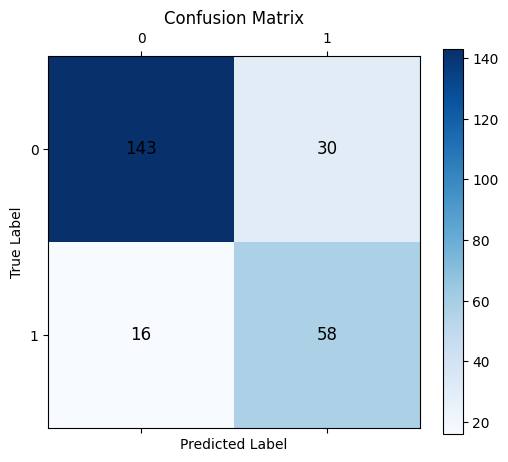

Model Performance Metrics
-----------------------------------
Accuracy:    0.814
Precision:   0.659
Recall:      0.784
Specificity: 0.827
F1 Score:    0.716


In [22]:
# Let's look at our predictions with more detail with the confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.matshow(cm, cmap="Blues")

plt.colorbar(cax)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black', fontsize=12)
        
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()

# Calculate additional performance metrics
TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)

print("Model Performance Metrics")
print("-" * 35)
print(f"Accuracy:    {accuracy:.3f}")
print(f"Precision:   {precision:.3f}")
print(f"Recall:      {recall:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1 Score:    {f1:.3f}")

### Can you build a better model? 

Inside this folder, create a new notebook (*File --> New --> Notebook*), name it `your-name.ipynb` and work on a new model to improve upon our current benchmark. You can experiment with different model types, adjust hyperparameters, or engineer new features to enhance performance.

Once you have made improvements, copy your notebook to the shared folder so your team members can review it. Remember to keep the outputs so the rest of your team members can see your results. 

Once you have finished your work, remember to stop your server (*File --> Hub Control Panel --> Stop Server*).